In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("bread basket.csv")
print("DataFrame shape :",data.shape)
data.head()

DataFrame shape : (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
# format data waktu
data['date_time'] = pd.to_datetime(data['date_time'],format="%d-%m-%Y %H:%M")

In [4]:
data['date_time'].dtype

dtype('<M8[ns]')

In [5]:
data["month"] = data['date_time'].dt.month
data["day"] = data['date_time'].dt.weekday
data["hour"] = data['date_time'].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


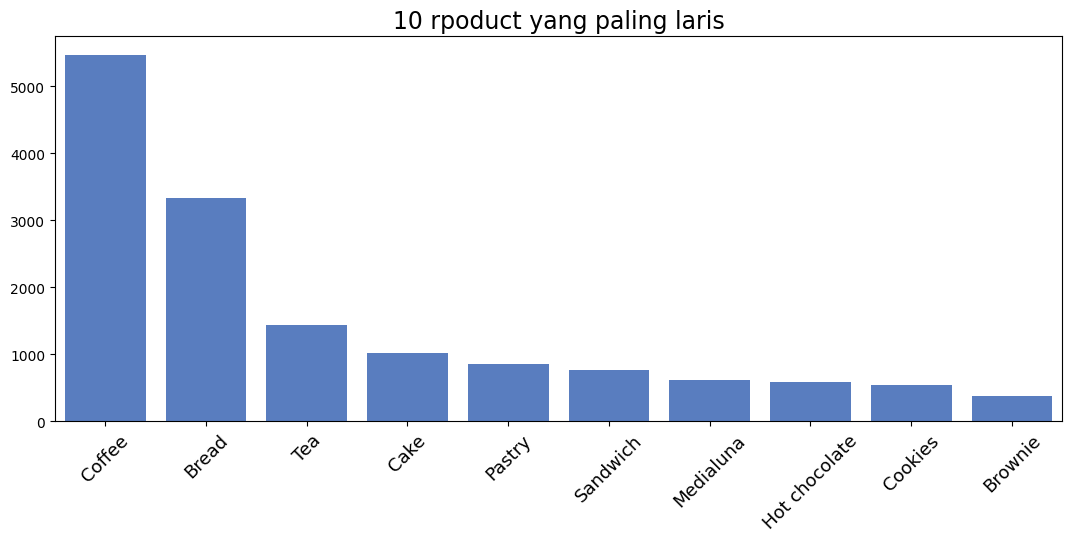

In [7]:
# menampilkan 10 item paling laris

plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index,
            y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 rpoduct yang paling laris', size = 17)
plt.show()


Text(0.5, 1.0, 'jumlah transaksi tiap bulan dari oktokber - april')

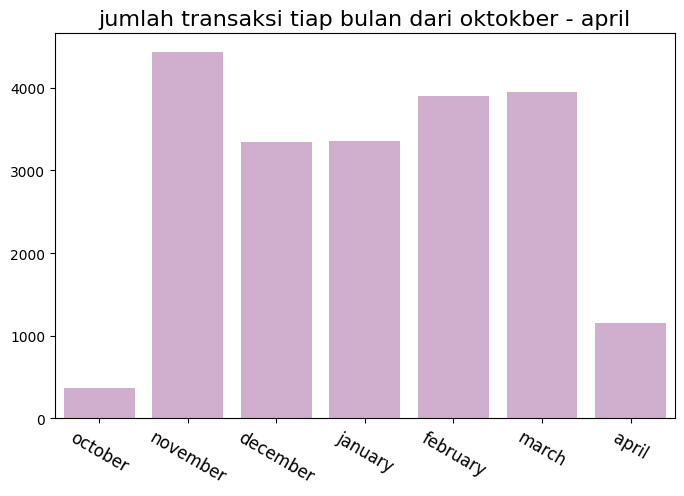

In [8]:
# transaksi tiap bulan

data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:],data_perbulan.iloc[:4]])

plt.figure(figsize=(8,5))
sns.barplot(
    x = ["october", "november", "december", "january", "february", "march", "april"],
    y = data_perbulan.values, color="#D5AAD3")
plt.xticks(size = 12, rotation = -30)
plt.title("jumlah transaksi tiap bulan dari oktokber - april", size = 16)

Text(0.5, 1.0, 'total transaksi tiap hari')

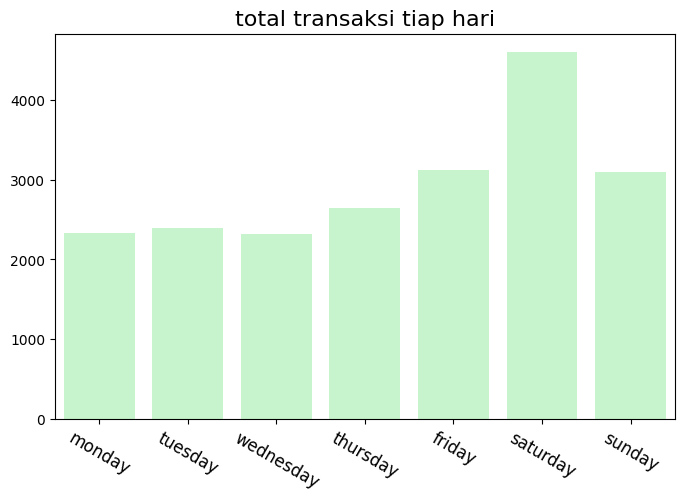

In [9]:
# transaksi per hari

data_perday = data.groupby('day')['Transaction'].count()

plt.figure(figsize=(8,5))
sns.barplot(
    x = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"],
    y = data_perday.values, color="#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("total transaksi tiap hari", size = 16)

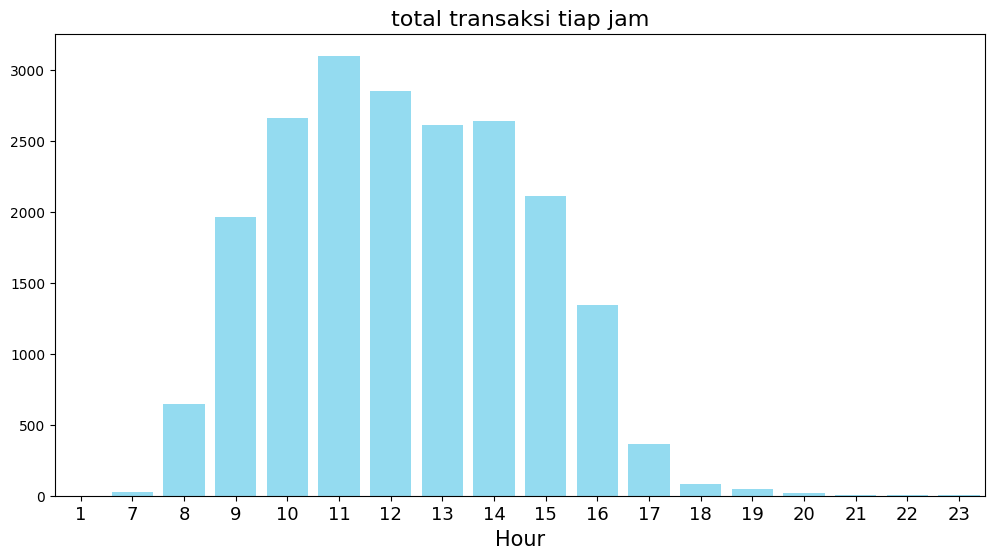

In [10]:
# pembelian tiap jam
data_perhour = data.groupby('hour')['Transaction'].count()

plt.figure(figsize=(12,6))
sns.barplot(
    x = data_perhour.index,
    y = data_perhour.values, color="#85E3FF")
plt.xlabel('Hour', size = 15)
plt.xticks(size = 13)
plt.title("total transaksi tiap jam", size = 16)
plt.show()

In [11]:
#  data preparation

In [12]:
data["Item"] =  data ["Item"].apply(lambda item: item.lower())

In [14]:
data["Item"] =  data ["Item"].apply(lambda item: item.strip())

In [15]:
data = data[["Transaction", "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [18]:
from mlxtend.frequent_patterns import association_rules, apriori

ModuleNotFoundError: No module named 'mlxtend'